*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
# Import libraries. You may or may not use all of these.
%pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

You should consider upgrading via the 'C:\Users\ayoro\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-03-09 03:27:10--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: 'insurance.csv.1'

     0K .......... .......... .......... .......... ......... 100% 2.19M=0.02s

2022-03-09 03:27:11 (2.19 MB/s) - 'insurance.csv.1' saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Starting data cleaning process and checking if the data is in the right format
# and confirming the data types of each column

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Getting summary of numerical columns
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


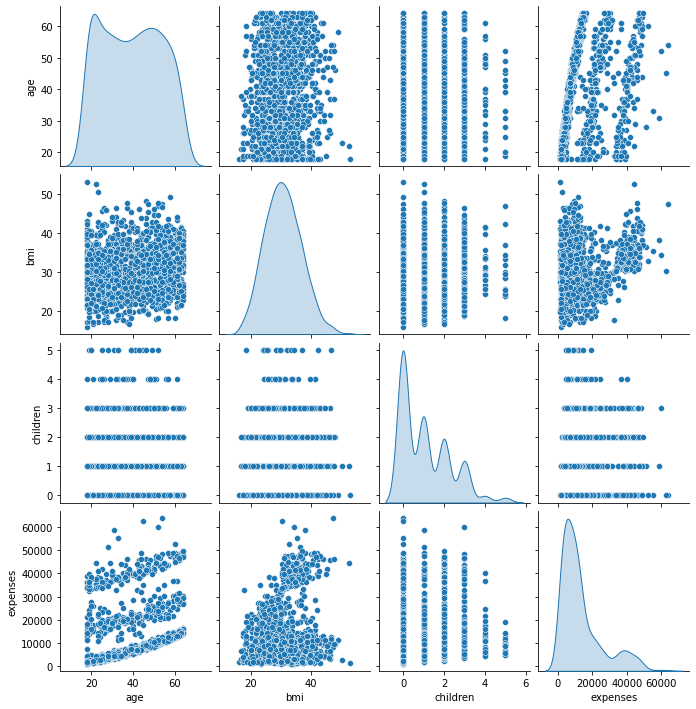

In [5]:
# The next thing will be to creat a plot of each numerical values against each other
# This is done to get a summary representation of how each variable relates to one another
sns.pairplot(dataset[['age','bmi','children','expenses',]], diag_kind = 'kde')

In [6]:
# Now our data seems clean with no empty rows and na values present
# the next thing to do is remove the label column (expenses) from the dataset

label = dataset.pop('expenses')

In [7]:
# Following the removal of the expenses column, the next thing to do is turn the categorical coulumns into numerical columns
# To do this, one-hot encoding techinque will be used to the categorical columns to ensure there is no bias associated with
# assigning distinct values to each categorical value

dataset = pd.get_dummies(dataset,columns = ['sex','smoker','region'])

In [8]:
# The next step is to split the dataset into training and testing data
# The same thing will be done for the labels as well
train_dataset = dataset.sample(frac = 0.8, random_state = 2)
test_dataset = dataset.drop(train_dataset.index)

train_labels = label.sample(frac = 0.8, random_state = 2)
test_labels = label.drop(train_labels.index)

In [9]:
# Since we have added new columns, it's advisable to take a look at the summary table once again
# We observe that the std and mean of our sample dataset varies. We then proceed with normalization of the data we have
train_dataset.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.081308,30.833832,1.093458,0.496262,0.503738,0.794393,0.205607,0.242056,0.244860,0.271963,0.241121
std,14.021963,6.134339,1.206722,0.500220,0.500220,0.404334,0.404334,0.428528,0.430205,0.445179,0.427964
min,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.600000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.875000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.100000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Normalizing the training and testing dataset
# We are using the normalizer from tensorflow
normalizer = tf.keras.layers.Normalization(axis=-1)

# calculating the mean and variance for each column 
normalizer.adapt(train_dataset)

# The normlizer can be called to reveal the mean and variance
print(normalizer.mean.numpy())

# The code normalizer.adapt(train_dataset) has normalized the whole dataset for us

[[39.08131    30.833834    1.0934579   0.4962617   0.50373834  0.7943925
   0.20560744  0.24205607  0.24485981  0.2719626   0.24112147]]


In [11]:
# Now since all the data seems to be in order, all we have to do is build the model now
# Then we compile after building the model
model = keras.Sequential([
      normalizer,
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(1)
  ])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss = 'mean_absolute_error',
    metrics = ['accuracy', 'mse'])

In [12]:
# Now we have to fit the model after compiling
history = model.fit(
    train_dataset,
    train_labels,
    epochs = 100,
    verbose = 0,
    validation_split = 0.2
)

9/9 - 0s - loss: 1751.8625 - accuracy: 0.0000e+00 - mse: 18471686.0000 - 113ms/epoch - 13ms/step
Testing set Mean Abs Error:  0.00 expenses
You passed the challenge. Great job!


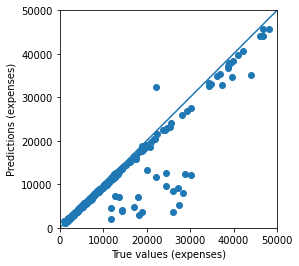

In [13]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
